In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [12]:
beta = (0.25, 0.75, 0.5)

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

In [13]:
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

In [5]:
def g(beta):
    return ydata - f(xdata, *beta)

In [14]:
beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt


array([0.24310669, 0.75213287, 0.51131501])

Text(0, 0.5, '$f(x, \\beta)$')

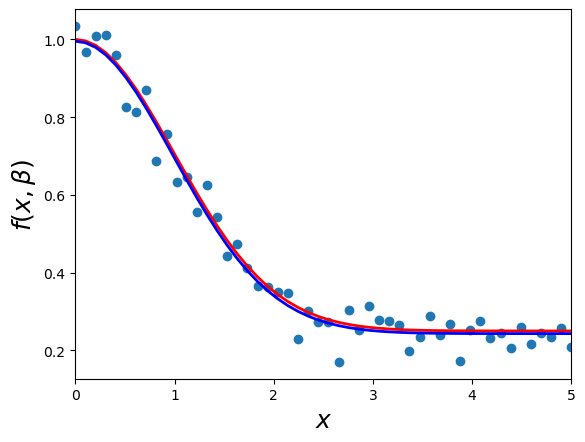

In [15]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)

In [16]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.24310669, 0.75213287, 0.51131501])

In [125]:
import numpy as np
from scipy.optimize import curve_fit

def exp_func(x, a, b):
    return a * np.exp(b * x)

x = np.linspace(0, 1, 100)
ruido = np.random.uniform(-0.1, 0.1, size=len(x))
y=x**3
datos = y + ruido

popt, pcov = curve_fit(exp_func, x, datos, p0=[1, 1])
a, b = popt
print(f"Parámetros ajustados: a={a:.3f}, b={b:.3f}")

Parámetros ajustados: a=0.022, b=3.826


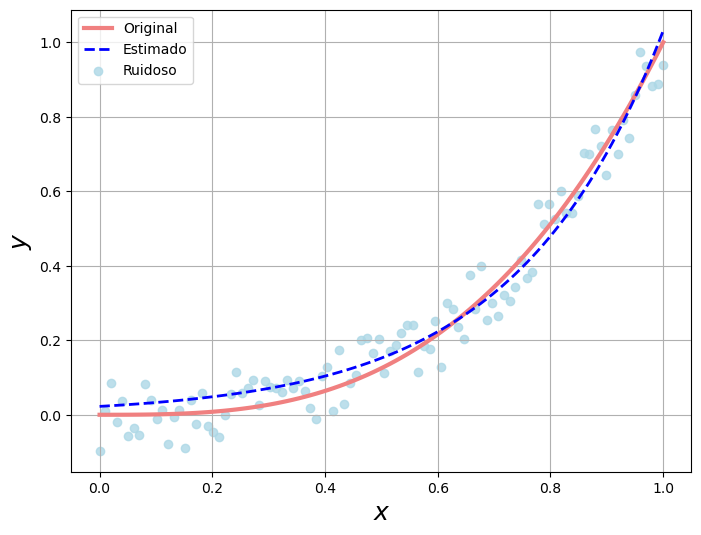

In [126]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, color='lightcoral', lw=3, label='Original')
ax.plot(x, exp_func(x, popt[0], popt[1]), lw=2, label='Estimado',color='blue', linestyle='--'  )
ax.scatter(x, datos, color='lightblue', alpha=0.8, label='Ruidoso')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()
plt.grid()
plt.show()

## Resumen

El método de Levenberg–Marquardt (LM) es un algoritmo de optimización numérica ampliamente utilizado para resolver problemas de mínimos cuadrados no lineales. Combina características del método de Gauss-Newton y del descenso por gradiente, logrando un equilibrio entre velocidad de convergencia y estabilidad. Es particularmente útil en ajuste de curvas, aprendizaje automático, visión por computadora y modelado matemático.

## Introducción

En muchos problemas científicos e ingenieriles, se busca encontrar un conjunto de parámetros que minimicen la diferencia entre un modelo matemático y datos experimentales. Este tipo de problemas se puede formular como un problema de mínimos cuadrados no lineales:

$$
\min_{\mathbf{x}} \sum_{i=1}^{m} [f_i(\mathbf{x})]^2
$$

donde $ f_i(\mathbf{x}) $ representa el residuo entre el modelo y los datos observados.

El método de Levenberg–Marquardt fue propuesto de manera independiente por Kenneth Levenberg en 1944 y Donald Marquardt en 1963 como una mejora a métodos existentes para resolver este tipo de problemas.

## Fundamentos Teóricos

El algoritmo LM puede interpretarse como una interpolación entre dos métodos clásicos:

- **Método de Gauss-Newton:** eficiente cuando la solución está cerca del óptimo, pero puede fallar si el punto inicial está lejos.
- **Descenso por gradiente:** más estable, pero lento cerca del óptimo.

El método LM introduce un parámetro de regularización \( \lambda \) que ajusta dinámicamente el comportamiento del algoritmo:

$$
(J^T J + \lambda I) \Delta x = - J^T f
$$

donde:
- $ J $ es la matriz Jacobiana de los residuos.
- $ I $ es la matriz identidad.
- $ \lambda $ es el parámetro de amortiguamiento.
- $ \Delta x $ es el cambio en los parámetros.

## Algoritmo

El procedimiento general del método de Levenberg–Marquardt es el siguiente:

1. Elegir un valor inicial para los parámetros $ \mathbf{x}_0 $.
2. Definir un valor inicial para $ \lambda $.
3. Calcular el vector de residuos $ f(\mathbf{x}) $ y la matriz Jacobiana $ J $.
4. Resolver la ecuación:
   $$
   (J^T J + \lambda I) \Delta x = - J^T f
   $$
5. Actualizar los parámetros:
   $$
   \mathbf{x}_{k+1} = \mathbf{x}_k + \Delta x
   $$
6. Si el error disminuye, reducir $ \lambda $; si aumenta, incrementar $\lambda $.
7. Repetir hasta convergencia o alcanzar un número máximo de iteraciones.

## Ventajas

- Alta robustez frente a malos puntos iniciales.
- Buena velocidad de convergencia cerca del óptimo.
- Amplia aplicabilidad en problemas reales.
- Estabilidad numérica mejorada respecto a Gauss-Newton.

## Desventajas

- Puede ser computacionalmente costoso para problemas de gran escala.
- Requiere el cálculo de la matriz Jacobiana.
- Sensible a la elección inicial del parámetro $ \lambda $.


## Referencias

1. Levenberg, K. (1944). A method for the solution of certain non-linear problems in least squares.
2. Marquardt, D. (1963). An algorithm for least-squares estimation of nonlinear parameters.
3. Nocedal, J., & Wright, S. (2006). Numerical Optimization.
4. Boyd, S., & Vandenberghe, L. (2004). Convex Optimization.
